Задание:

У вас есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема — к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности. 

Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. 

Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.

## Описание данных
* `order_id - id` заказа
* `delivery_time` - время доставки в минутах
* `district` - район доставки
* `experiment_group` - экспериментальная группа
##

 Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет
##
 Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('Solarize_Light2')

%matplotlib inline

In [24]:
data = pd.read_csv('experiment_pizza.csv')
data_control = data.query('experiment_group == "control"')
data_test = data.query('experiment_group == "test"')
data.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


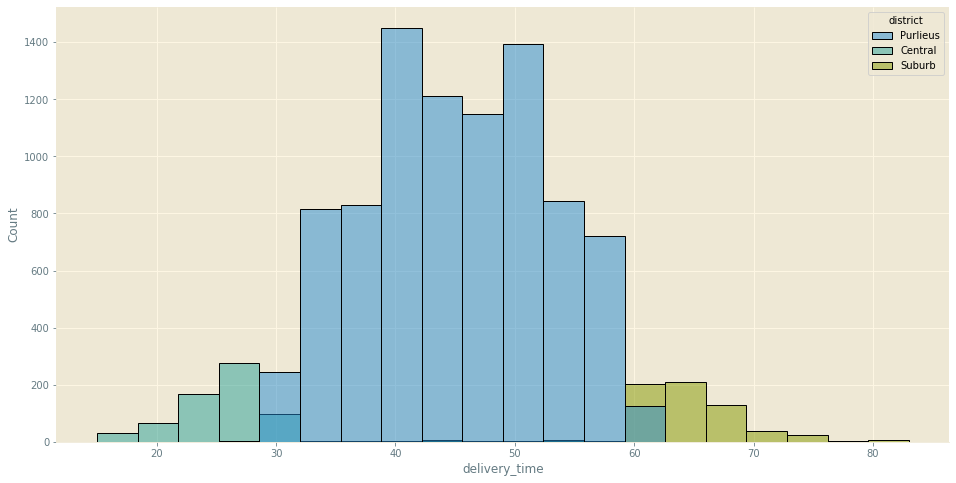

In [30]:
plt.figure(figsize=(16,8))
sns.histplot(data = data_control, x = 'delivery_time', hue='district', bins = 20)
sns.despine()

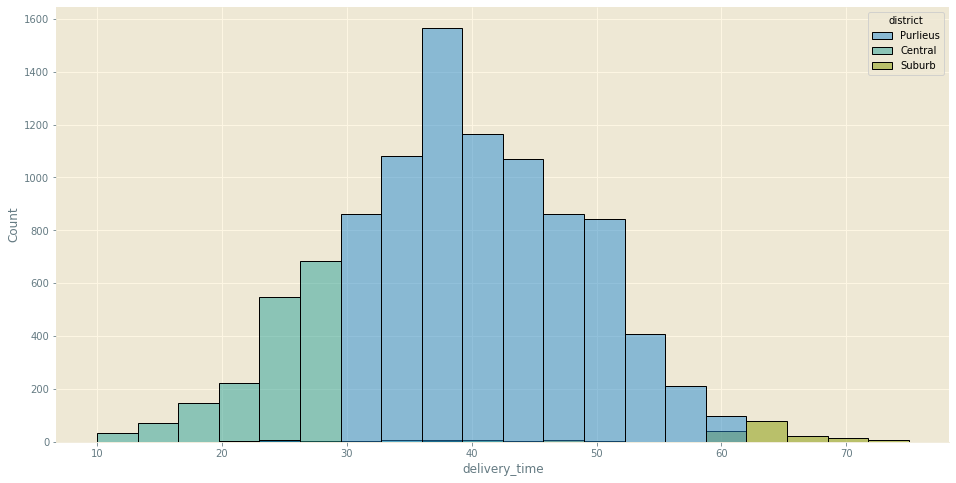

In [31]:
plt.figure(figsize=(16,8))
sns.histplot(data = data_test, x = 'delivery_time', hue='district', bins = 20)
sns.despine()

In [32]:
data_test.drop_duplicates()
data_control.drop_duplicates()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
10087,2708,23.0,Central,control
10088,3918,45.0,Central,control
10089,9544,41.0,Suburb,control
10090,1101,38.0,Central,control


In [36]:
abs(len(data_control) - len(data_test))

12

Применяем тест Шапиро-Уилка для проверки на нормальность


In [42]:
scipy.stats.shapiro(data_test.delivery_time.sample(1000, random_state=17))

ShapiroResult(statistic=0.9975479245185852, pvalue=0.14013493061065674)

In [43]:
scipy.stats.shapiro(data_control.delivery_time.sample(1000, random_state=17))

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

In [39]:
np.round(data_test.delivery_time.std(), 2)

9.88

In [44]:
np.round(data_control.delivery_time.std(), 2)

9.99

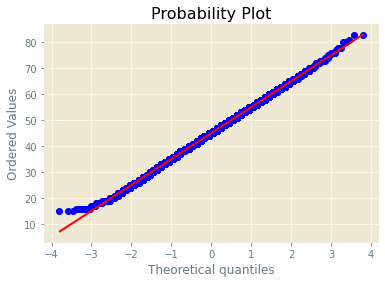

In [52]:
stats.probplot(data_control.delivery_time, dist="norm", plot=plt)
sns.despine()


In [53]:
scipy.stats.ttest_ind(data_test.delivery_time, 
                      data_control.delivery_time)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [57]:
(data_test.delivery_time.mean() - data_control.delivery_time.mean())/data_control.delivery_time.mean() * 100

-13.354653121660812

Раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте меньше, чем в контроле.